In [51]:
import numpy as np
from math import *
import matplotlib.pyplot as plt


Ts = 100 # temperatura da superfície em [ºC]
Tinf = 25 # temperatura do ambiente com fluido em [ºC]
rAleta = 12e-3 # raio da aleta em [m]
L = 168e-3 # comprimento da aleta em [m]
h = 15 # coeficiente de transferência de calor por convecção natural em [W/(m^2*K)] 
k = 154 # coeficiente de condutividade térmica do alumínio 2014 em [W/(m*K)]
P = 2*pi*rAleta # perimétro da base da aleta
Atr = pi*(rAleta**2) # Área de transferência de calor


A temperatura na extremidade da aleta é: 84.732 ºC
Esse é o valor de m 4.029114820126901


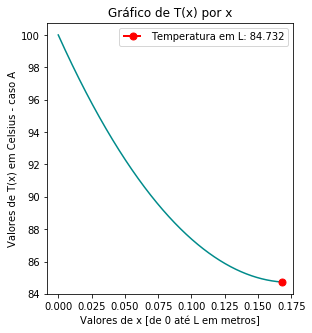

In [52]:
m = sqrt((h*P)/(k*Atr))
lista_x = np.linspace(0, L, 10000)

listaTemp = []

for x in lista_x:
    num = (cosh(m*(L-x)) + (h/(m*k))*sinh(m*(L-x)))
    den = (cosh(m*L) + (h/(m*k))*sinh(m*L))
    temp = ((num/den)*(Ts - Tinf)) + 25
    listaTemp.append(temp)


plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(lista_x, listaTemp, color="darkcyan")
plt.plot(lista_x[10000-1], listaTemp[10000-1], 'ro--', linewidth=2, markersize= 7, label = "Temperatura em L: 84.732")
plt.title("Gráfico de T(x) por x")
plt.xlabel("Valores de x [de 0 até L em metros]")
plt.ylabel("Valores de T(x) em Celsius - caso A")
plt.legend()

print(f'A temperatura na extremidade da aleta é: {round(listaTemp[10000-1], 3)} ºC')
print(f'Esse é o valor de m {m}')


In [53]:
# taxa de transferência de calor
M = (Ts- Tinf)*sqrt(h*P*k*Atr)
num2 = (sinh(m*L) + (h/(m*k))*cosh(m*L))
den2 = (cosh(m*L) + (h/(m*k))*sinh(m*L))
qa = M*(num2/den2)

areaTotal = Atr + (2*pi*rAleta*L)
eficiencia = qa/(h*areaTotal*(Ts - Tinf))

efetividade = qa/ (h*Atr*(Ts-Tinf))

# print(f'Área total {areaTotal}')
print(f'A taxa de transferência de calor é {round(qa, 3)} W')
print(f'A eficiência é {round(eficiencia, 3)}')
print(f'A efetividade é {round(efetividade, 3)}')

A taxa de transferência de calor é 12.738 W
A eficiência é 0.863
A efetividade é 25.028


 Essa é a taxa de transferência de calor para a aleta infinita: 21.053 W
O comprimento ideal seria: 0.744 m


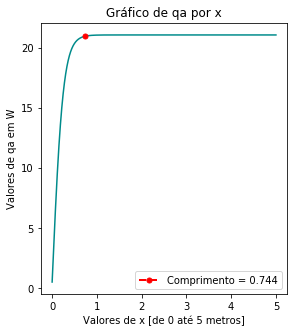

In [54]:
M_aleta_infinita = (Ts- Tinf)*sqrt(h*P*k*Atr)
taxa_transf_calor_aleta_inf = M_aleta_infinita

print(f' Essa é a taxa de transferência de calor para a aleta infinita: {round(taxa_transf_calor_aleta_inf, 3)} W')


# d= 2.64/m
# print(d)

lista_comp = np.linspace(0,5, 10000)
lista_de_qa = []

x_ideal = 0 # x para a qual qa do caso A é praticamente o mesmo qa para a aleta infinita
qa_ideal_graf = 0 # salvando o qa que é praticamente igual para plotar esse ponto no gráfico

nao_encontrou = 1 #flag que permite salvar esse valor de x e qa uma única vez, para não selecionar os últimos valores

for l in lista_comp:
    M_casoA = (Ts- Tinf)*sqrt(h*P*k*Atr)
    num3 = (sinh(m*l) + (h/(m*k))*cosh(m*l))
    den3 = (cosh(m*l) + (h/(m*k))*sinh(m*l))
    qa_ideal = M_casoA*(num3/den3)
    lista_de_qa.append(qa_ideal)
    if nao_encontrou and abs(qa_ideal - M) <= 0.1:
        x_ideal = l
        qa_ideal_graf = qa_ideal
        nao_encontrou = 0
    

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(lista_comp, lista_de_qa, color="darkcyan")
plt.plot(x_ideal, qa_ideal_graf, 'ro--', linewidth=2, markersize=5, label= "Comprimento = 0.744")
plt.title("Gráfico de qa por x")
plt.xlabel("Valores de x [de 0 até 5 metros]")
plt.ylabel("Valores de qa em W")
plt.legend()

print(f'O comprimento ideal seria: {round(x_ideal, 3)} m')